In [4]:
# Importing necessary libraries for data manipulation, visualization, and association rule mining
import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical operations
import seaborn as sns     # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Importing apriori algorithm and association_rules function from mlxtend library
from mlxtend.frequent_patterns import apriori  # For generating frequent itemsets
from mlxtend.frequent_patterns import association_rules  # For generating association rules

# Importing mlxtend library as a whole
import mlxtend as ml  # General library import for other potential uses from mlxtend


In [5]:
retail= pd.read_csv('../../Data/MarketBasketAnalysis/retail_clean.csv')

In [6]:
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(6, 0, 'REX CASH+CARRY JUMBO SHOPPER'),
  Text(7, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(8, 0, 'STRAWBERRY CERAMIC TRINKET BOX'),
  Text(9, 0, 'HOME BUILDING BLOCK WORD')])

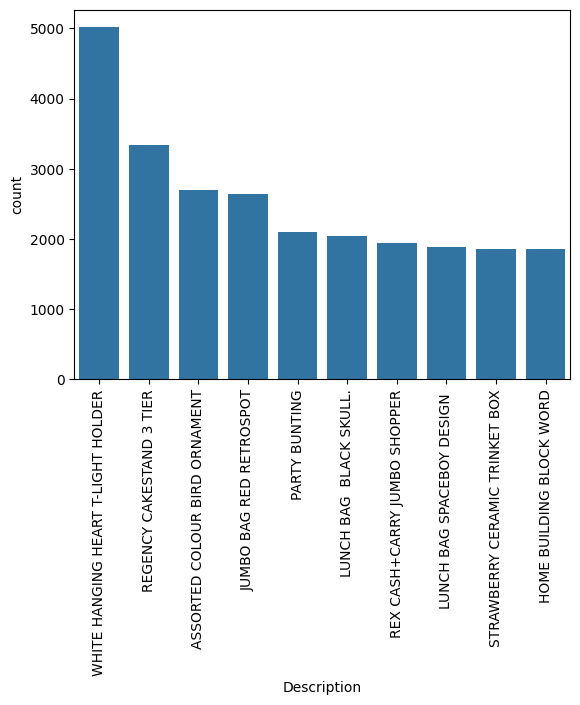

In [8]:
# Using Seaborn to create a count plot of the top 10 most frequent product descriptions in the 'retail' dataset
#iloc selects the first 10 rows (top 10 most frequent descriptions), and 
#index retrieves the labels (product descriptions) of these rows to be used for ordering in the plot.
sns.countplot(x='Description', data=retail, order=retail['Description'].value_counts().iloc[:10].index)

# Rotating the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)


retail.groupby(['Invoice']):

This part groups the retail DataFrame by the 'Invoice' column. Grouping means that all rows with the same invoice number are collected together.
['Description']:

After grouping by 'Invoice', this selects the 'Description' column within each group.
.size():

The size() function counts the number of occurrences in each group. In this context, it counts the number of product descriptions for each invoice, effectively counting the number of items in each invoice (order size).
.reset_index():

The reset_index() function resets the index of the resulting Series or DataFrame to a default integer index. This is necessary because the result of groupby and size has the 'Invoice' values as its index. Resetting the index turns 'Invoice' back into a regular column.


In [9]:
order_size= retail.groupby(['Invoice'])['Description'].size().reset_index()

In [10]:
order_size.describe()

,Invoice,Description
count,36975.000000,36975.000000
mean,536561.752265,21.081677
std,26580.252535,22.964145
min,489434.000000,1.000000
25%,513877.000000,6.000000
50%,536437.000000,15.000000
75%,559882.000000,27.000000
max,581587.000000,542.000000


count:
Invoice: 36975 unique invoices.
Description: 36975 total product descriptions (items sold).

mean:
Invoice: The average invoice number is 536561.752265 (though invoice numbers are typically identifiers, so this is less meaningful).
Description: The average number of items per invoice is 21.081677.

std (standard deviation):
Invoice: The standard deviation of invoice numbers is 26580.252535.
Description: The standard deviation of items per invoice is 22.964145.

min (minimum):
Invoice: The smallest invoice number is 489434.
Description: The smallest number of items in an invoice is 1.

25% (first quartile):
Invoice: 25% of the invoice numbers are less than 513877.
Description: 25% of the invoices have 6 or fewer items.

50% (median):
Invoice: 50% of the invoice numbers are less than 536437.
Description: 50% of the invoices have 15 or fewer items.

75% (third quartile):
Invoice: 75% of the invoice numbers are less than 559882.
Description: 75% of the invoices have 27 or fewer items.

max (maximum):
Invoice: The largest invoice number is 581587.
Description: The largest number of items in an invoice is 542.


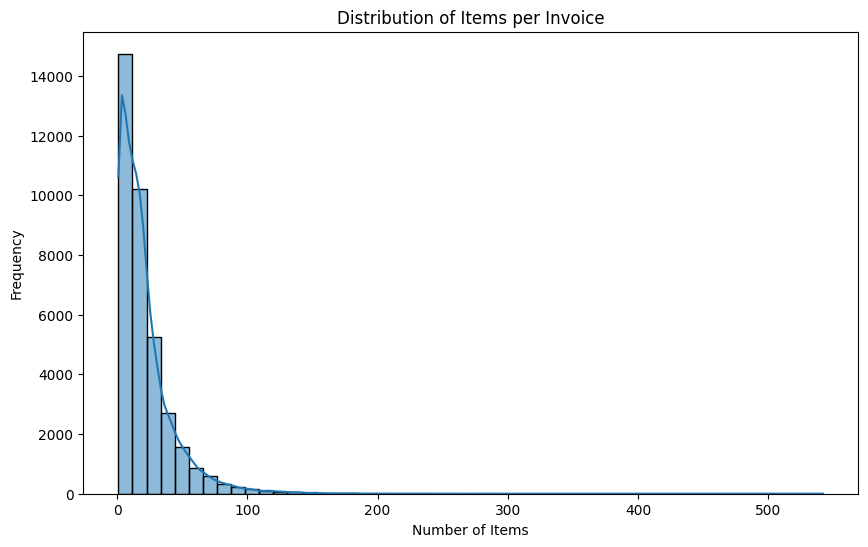

In [11]:
import matplotlib.pyplot as plt

# Assuming 'order_size' DataFrame has been created as explained earlier
order_size1 = retail.groupby(['Invoice'])['Description'].size().reset_index(name='Count')

# Plotting the histogram of the 'Count' column
plt.figure(figsize=(10, 6))
sns.histplot(order_size1['Count'], bins=50, kde=True)
plt.title('Distribution of Items per Invoice')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='Description'>

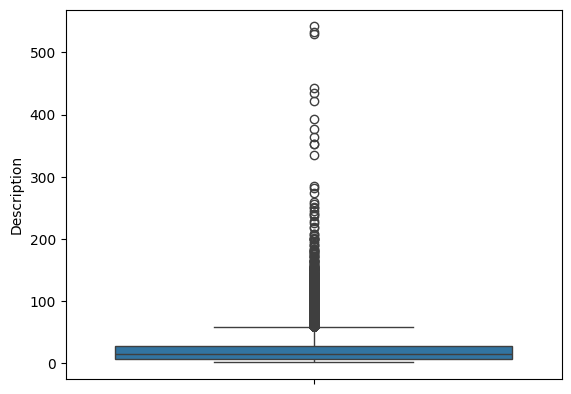

In [12]:
sns.boxplot(y='Description',data= order_size)

In [13]:
invoice_desc_count= retail.groupby(['Invoice','Description']).size().reset_index(name='count')
invoice_desc_count.head()

,Invoice,Description,count
0,489434,WHITE CHERRY LIGHTS,1
1,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1
2,489434,FANCY FONT HOME SWEET HOME DOORMAT,1
3,489434,PINK CHERRY LIGHTS,1
4,489434,PINK DOUGHNUT TRINKET POT,1


In [14]:
# Assuming 'invoice_desc_count' DataFrame is already created and contains columns 'Invoice', 'Description', and 'count'
baskets = (
    invoice_desc_count
    .groupby(['Invoice', 'Description'])['count']  # Group by 'Invoice' and 'Description', then sum the 'count'
    .sum()
    .unstack()  # Pivot the table to have 'Description' as columns and 'Invoice' as index
    .reset_index()  # Reset the index to turn 'Invoice' back into a column
    .fillna(0)  # Replace NaN values with 0
    .set_index('Invoice')  # Set 'Invoice' as the index
)

# Display the resulting 'baskets' DataFrame
baskets


Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
#Encoding the data into a binary matrix is a crucial step in preparing the dataset for association rule mining and other machine learning algorithms. 
#By following the steps above, you can efficiently transform your transactional data into the required format.

# Convert counts to binary
baskets_binary = baskets.map(lambda x: 1 if x > 0 else 0)

# Display the encoded DataFrame
print(baskets_binary)

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
Invoice                                                                       
489434                                         0                          0   
489435                                         0                          0   
489436                                         0                          0   
489437                                         0                          0   
489438                                         0                          0   
...                                          ...                        ...   
581583                                         0                          0   
581584                                         0                          0   
581585                                         0                          0   
581586                                         0                          0   
581587                                         0    

In [16]:
baskets_binary

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Key Concepts
Frequent Itemsets: These are groups of items that appear frequently together in transactions.

Support: The support of an itemset is the proportion of transactions in the dataset in which the itemset appears. For example, if "bread" appears in 30 out of 100 transactions, the support for "bread" is 0.3.

Confidence: The confidence of a rule is the proportion of transactions that contain the antecedent in which the rule's consequent is found. For example, if the rule is {milk} -> {bread}, and it is found that "milk" appears in 40 transactions while "milk and bread" appear together in 30 transactions, the confidence is 30/40 = 0.75.

Lift: The lift of a rule is the ratio of the observed support to that expected if the items were independent. A lift greater than 1 indicates a positive association, while a lift less than 1 indicates a negative association.

How the Apriori Algorithm Works
Generate Candidate Itemsets: Initially, the algorithm generates all possible itemsets of a given length (starting with single items).

Calculate Support: The algorithm then calculates the support for each candidate itemset.

Prune: Itemsets that do not meet the minimum support threshold are removed. The remaining itemsets are considered frequent itemsets.

Repeat: The process is repeated by generating new candidate itemsets from the frequent itemsets found in the previous step, calculating their support, and pruning those that do not meet the support threshold. This continues until no more frequent itemsets can be found.

Generate Rules: Once all frequent itemsets are found, the algorithm generates association rules from these itemsets and calculates the confidence and lift for each rule.

In [17]:
frequent_itemsets= apriori(baskets_binary,min_support=0.01,use_colnames=True)
rules= association_rules(frequent_itemsets,metric='lift')
rules.sort_values('confidence',ascending=False ,inplace=True)
rules.head()

/Users/chetanayogeesh/Documents/GitHub/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
352,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.016146,0.025233,0.014415,0.892797,35.381759,0.014008,9.092746,0.987684
346,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.011521,0.025233,0.010223,0.887324,35.164848,0.009932,8.651055,0.982887
297,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778,0.993578
354,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.016903,0.028560,0.014415,0.852800,29.860114,0.013932,6.599458,0.983129
293,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.015037,0.016660,0.012765,0.848921,50.955924,0.012515,6.508775,0.995342


Explanation of the Code
frequent_itemsets= apriori(baskets_encoded, min_support=0.009, use_colnames=True):

This line uses the Apriori algorithm from the mlxtend.frequent_patterns module to find frequent itemsets.
baskets_encoded: This is the DataFrame where the transactional data has been encoded in binary format.
min_support=0.009: This sets the minimum support threshold for the itemsets. Only itemsets with support equal to or greater than 0.009 will be considered frequent.
use_colnames=True: This ensures that the resulting frequent itemsets are returned with their original column names instead of column indices.
rules = association_rules(frequent_itemsets, metric='lift'):

This line generates the association rules from the frequent itemsets found by the Apriori algorithm.
frequent_itemsets: The frequent itemsets generated by the Apriori algorithm.
metric='lift': This sets the evaluation metric for the rules to lift. Lift measures how much more likely the consequent item is bought when the antecedent item is bought compared to the consequent's baseline purchase rate.
rules.sort_values('confidence', ascending=False, inplace=True):

This line sorts the generated association rules based on the confidence metric in descending order.
confidence: The measure of how often the consequent item is bought when the antecedent item is bought.
ascending=False: This sorts the values in descending order, so the rules with the highest confidence appear first.
inplace=True: This sorts the DataFrame in place without creating a new DataFrame.
rules.head():

This line displays the top 5 association rules after sorting by confidence.

The rules DataFrame will contain several columns, including:

antecedents: The item(s) on the left-hand side of the rule.

consequents: The item(s) on the right-hand side of the rule.

antecedent support: The support of the antecedent itemset.

consequent support: The support of the consequent itemset.

support: The support of the rule (both antecedent and consequent together).

confidence: The confidence of the rule (how often the rule has been found to be true).

lift: The lift of the rule (how much more likely the consequent is given the antecedent compared to the baseline).

In [18]:
a= retail.groupby('Description')['Quantity'].sum().reset_index()

In [19]:
a['cut']= pd.qcut(a['Quantity'],8,labels=False)
a['Bins']= pd.qcut(a['Quantity'],8,labels=None)

In [20]:
a

,Description,Quantity,cut,Bins
0,DOORMAT UNION JACK GUNS AND ROSES,167,2,"(90.0, 247.0]"
1,3 STRIPEY MICE FELTCRAFT,662,4,"(516.0, 995.0]"
2,4 PURPLE FLOCK DINNER CANDLES,324,3,"(247.0, 516.0]"
3,50'S CHRISTMAS GIFT BAG LARGE,1885,6,"(1838.5, 3910.0]"
4,ANIMAL STICKERS,385,3,"(247.0, 516.0]"
...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,4894,7,"(3910.0, 105185.0]"
5279,ZINC TOP 2 DOOR WOODEN SHELF,242,2,"(90.0, 247.0]"
5280,ZINC WILLIE WINKIE CANDLE STICK,6166,7,"(3910.0, 105185.0]"
5281,ZINC WIRE KITCHEN ORGANISER,25,1,"(24.0, 90.0]"


In [22]:
slow_moving= np.unique(a[a.cut==6].Description)

In [23]:
slow_moving

array([" 50'S CHRISTMAS GIFT BAG LARGE", ' DOLLY GIRL BEAKER',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ' WHITE CHERRY LIGHTS',
       '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY',
       '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
       '200 RED + WHITE BENDY STRAWS', '3 HOOK HANGER MAGIC GARDEN',
       '3 HOOK PHOTO SHELF ANTIQUE WHITE',
       '3 PIECE SPACEBOY COOKIE CUTTER SET', '36 DOILIES DOLLY GIRL',
       '36 FOIL HEART CAKE CASES', '36 PENCILS TUBE RED SPOTTY',
       '36 PENCILS TUBE SKULLS', '36 PENCILS TUBE WOODLAND',
       '3D TRADITIONAL CHRISTMAS STICKERS',
       '3D VINTAGE CHRISTMAS STICKERS ',
       '6 CHOCOLATE LOVE HEART T-LIGHTS', "6 GIFT TAGS 50'S CHRISTMAS ",
       '6 GIFT TAGS VINTAGE CHRISTMAS ', '6 RIBBONS ELEGANT CHRISTMAS ',
       '6 RIBBONS EMPIRE  ', '6 ROCKET BALLOONS ',
       '75 GREEN FAIRY CAKE CASES', 'ABC TREASURE BOOK BOX ',


In [24]:
len(slow_moving)

660

In [25]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")


rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode"):

rules["antecedents"]: Accesses the antecedents column in the rules DataFrame.

.apply(lambda x: list(x)[0]): Converts the frozenset (or set) in each cell to a list, and then takes the first item from the list. Since antecedents and consequents should only contain one item in a simple case, this converts the set to a single item.

.astype("unicode"): Ensures that the data is in the Unicode string format, which is compatible with various text processing operations.

rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode"):

Similar to the antecedents column, this line processes the consequents column to convert each frozenset or set to a single Unicode string.

In [26]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
352,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.016146,0.025233,0.014415,0.892797,35.381759,0.014008,9.092746,0.987684
346,REGENCY CAKESTAND 3 TIER,GREEN REGENCY TEACUP AND SAUCER,0.011521,0.025233,0.010223,0.887324,35.164848,0.009932,8.651055,0.982887
297,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778,0.993578
354,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.016903,0.028560,0.014415,0.852800,29.860114,0.013932,6.599458,0.983129
293,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,0.015037,0.016660,0.012765,0.848921,50.955924,0.012515,6.508775,0.995342
...,...,...,...,...,...,...,...,...,...,...
93,WHITE HANGING HEART T-LIGHT HOLDER,GIN + TONIC DIET METAL SIGN,0.132197,0.037458,0.010602,0.080196,2.140983,0.005650,1.046465,0.614108
104,WHITE HANGING HEART T-LIGHT HOLDER,HAND OVER THE CHOCOLATE SIGN,0.132197,0.035159,0.010575,0.079992,2.275152,0.005927,1.048731,0.645848
325,WHITE HANGING HEART T-LIGHT HOLDER,WOOD S/3 CABINET ANT WHITE FINISH,0.132197,0.027099,0.010439,0.078969,2.914047,0.006857,1.056317,0.756894
223,WHITE HANGING HEART T-LIGHT HOLDER,LUNCH BAG CARS BLUE,0.132197,0.048600,0.010358,0.078355,1.612233,0.003934,1.032284,0.437590


In [27]:
slow_moving

array([" 50'S CHRISTMAS GIFT BAG LARGE", ' DOLLY GIRL BEAKER',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ' WHITE CHERRY LIGHTS',
       '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY',
       '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
       '200 RED + WHITE BENDY STRAWS', '3 HOOK HANGER MAGIC GARDEN',
       '3 HOOK PHOTO SHELF ANTIQUE WHITE',
       '3 PIECE SPACEBOY COOKIE CUTTER SET', '36 DOILIES DOLLY GIRL',
       '36 FOIL HEART CAKE CASES', '36 PENCILS TUBE RED SPOTTY',
       '36 PENCILS TUBE SKULLS', '36 PENCILS TUBE WOODLAND',
       '3D TRADITIONAL CHRISTMAS STICKERS',
       '3D VINTAGE CHRISTMAS STICKERS ',
       '6 CHOCOLATE LOVE HEART T-LIGHTS', "6 GIFT TAGS 50'S CHRISTMAS ",
       '6 GIFT TAGS VINTAGE CHRISTMAS ', '6 RIBBONS ELEGANT CHRISTMAS ',
       '6 RIBBONS EMPIRE  ', '6 ROCKET BALLOONS ',
       '75 GREEN FAIRY CAKE CASES', 'ABC TREASURE BOOK BOX ',


In [28]:
rules[rules.consequents.isin(slow_moving)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
297,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778,0.993578
293,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,0.015037,0.016660,0.012765,0.848921,50.955924,0.012515,6.508775,0.995342
295,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE BEDROOM,0.012441,0.015037,0.010331,0.830435,55.225407,0.010144,5.808755,0.994262
292,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE BEDROOM,0.016660,0.015037,0.012765,0.766234,50.955924,0.012515,4.213452,0.996985
294,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE LIVINGROOM,0.015037,0.012441,0.010331,0.687050,55.225407,0.010144,3.155649,0.996883
296,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE LIVINGROOM,0.016660,0.012441,0.011034,0.662338,53.238989,0.010827,2.924694,0.997841
83,FELTCRAFT PRINCESS LOLA DOLL,FELTCRAFT PRINCESS CHARLOTTE DOLL,0.016146,0.016795,0.010250,0.634841,37.799100,0.009979,2.692538,0.989521
82,FELTCRAFT PRINCESS CHARLOTTE DOLL,FELTCRAFT PRINCESS LOLA DOLL,0.016795,0.016146,0.010250,0.610306,37.799100,0.009979,2.524683,0.990174
127,RED KITCHEN SCALES,IVORY KITCHEN SCALES,0.021149,0.028830,0.011765,0.556266,19.294498,0.011155,2.188630,0.968658
126,IVORY KITCHEN SCALES,RED KITCHEN SCALES,0.028830,0.021149,0.011765,0.408068,19.294498,0.011155,1.653652,0.976319


In [29]:
rules.to_csv('market-basket-data.csv', index=False)